In [32]:
# Importing the Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [33]:

from sklearn.metrics import classification_report, recall_score, precision_score ,average_precision_score, plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate ,KFold, StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer, QuantileTransformer, RobustScaler

In [34]:
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [35]:
import warnings
warnings.filterwarnings('ignore')

## Step 1: Understanding the Data

In [36]:
# Loading the Data set into a Pandas Dataframe
credit_fraud=pd.read_csv('fraudTrain.csv')

In [37]:
credit_fraud.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [38]:
credit_fraud.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296665,1296665,2020-06-21 12:08:42,213193596103206,fraud_Gulgowski LLC,home,72.17,James,Hunt,M,7369 Gabriel Tunnel,...,45.7549,-84.4470,95,Electrical engineer,1994-02-09,108c103b26f686c24c021aaf4210977e,1371816522,44.938461,-83.996234,0
1296666,1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,...,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0
1296667,1296667,2020-06-21 12:10:56,4822367783500458,"fraud_Hahn, Douglas and Schowalter",travel,19.71,Christopher,Farrell,M,97070 Anderson Land,...,28.0758,-81.5929,33804,Exercise physiologist,1991-01-01,34e72e0a659a6c8f4a20ee65594f3a7d,1371816656,27.465871,-81.511804,0
1296668,1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0
1296669,1296669,2020-06-21 12:11:36,4400011257587661852,fraud_Stiedemann Inc,misc_pos,37.38,Marissa,Powell,F,474 Allen Haven,...,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,9a7ea2625cf8303efe34e3c09546868f,1371816696,41.728638,-99.039660,0
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [39]:
credit_fraud.shape

(1296675, 23)

In [40]:
# 0 represents 'No Fraud' and 1 represents 'Fraud'
credit_fraud['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

Clearly from the above data, we observe a Class Imbalance for the 'Class' feature

In [41]:
# Checking if there are repeated Frauds
frauds = credit_fraud[credit_fraud['is_fraud']==1].loc[credit_fraud.duplicated()]
print('Repeated scams: {} '.format(len(frauds)))
print('\n')
frauds

Repeated scams: 0 




,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [42]:
# Statistical Information about the 'Amount' feature for all transactions
credit_fraud['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [43]:
credit_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [44]:
credit_fraud.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [45]:
# Checking for any null values
credit_fraud.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

- Seems like there are No Missing Values for any of the given features.

In [46]:
credit_fraud=credit_fraud.drop('Unnamed: 0',axis=1)

In [47]:
credit_fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [48]:
# Including Only necessary columns for the data set

credit_fraud = credit_fraud[['trans_date_trans_time','amt','gender','lat','long','city_pop','dob','merch_lat','merch_long','is_fraud']]


In [49]:
credit_fraud.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0


- Our Target variable is 'is_fraud'

In [50]:
# Converting 2 columns to datetime for fraudTrain data set

credit_fraud.dob = pd.to_datetime(credit_fraud['dob'])
credit_fraud.trans_date_trans_time = pd.to_datetime(credit_fraud['trans_date_trans_time'])

In [51]:
# Creating a new column called Transaction date and converting into datetime

credit_fraud['Transaction_Date'] = pd.to_datetime(credit_fraud['trans_date_trans_time'], format='%Y:%M:%D').dt.date
credit_fraud.Transaction_Date = pd.to_datetime(credit_fraud['Transaction_Date'])

In [52]:
# Creating a new column called Transaction Time

credit_fraud['Transaction_Time'] = pd.to_datetime(credit_fraud['trans_date_trans_time'], format='%Y:%M:%D').dt.time

In [53]:
# Creating a new column called Age

credit_fraud['Age'] = round((credit_fraud['Transaction_Date'] - credit_fraud['dob'])/np.timedelta64(1, 'Y'))
credit_fraud.Age = credit_fraud.Age.astype('int')

In [54]:
credit_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   amt                    1296675 non-null  float64       
 2   gender                 1296675 non-null  object        
 3   lat                    1296675 non-null  float64       
 4   long                   1296675 non-null  float64       
 5   city_pop               1296675 non-null  int64         
 6   dob                    1296675 non-null  datetime64[ns]
 7   merch_lat              1296675 non-null  float64       
 8   merch_long             1296675 non-null  float64       
 9   is_fraud               1296675 non-null  int64         
 10  Transaction_Date       1296675 non-null  datetime64[ns]
 11  Transaction_Time       1296675 non-null  object        
 12  Age                    12966

In [55]:
# Creating a function to calculate the Day of Week
import datetime
import math
import calendar
def DoW(x):
    day = datetime.datetime.weekday(x)
    return (calendar.day_name[day])

credit_fraud['Day_of_Week'] = credit_fraud['Transaction_Date'].apply(DoW)

In [56]:
credit_fraud.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,Transaction_Date,Transaction_Time,Age,Day_of_Week
0,2019-01-01 00:00:18,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,2019-01-01,00:00:18,31,Tuesday
1,2019-01-01 00:00:44,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019-01-01,00:00:44,41,Tuesday
2,2019-01-01 00:00:51,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,2019-01-01,00:00:51,57,Tuesday
3,2019-01-01 00:01:16,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,2019-01-01,00:01:16,52,Tuesday
4,2019-01-01 00:03:06,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,2019-01-01,00:03:06,33,Tuesday


In [57]:
# # Creating a new column Month 

credit_fraud['Month'] = pd.DatetimeIndex(credit_fraud.trans_date_trans_time).month

# Making Gender column binary

credit_fraud['gender'] = credit_fraud['gender'].map({'F':1, 'M':0})
credit_fraud['Day_of_Week'] = credit_fraud['Day_of_Week'].map({'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4,
                                                          'Friday':5, 'Saturday':6, 'Sunday': 7})

In [58]:
credit_fraud.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,Transaction_Date,Transaction_Time,Age,Day_of_Week,Month
0,2019-01-01 00:00:18,4.97,1,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,2019-01-01,00:00:18,31,2,1
1,2019-01-01 00:00:44,107.23,1,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019-01-01,00:00:44,41,2,1
2,2019-01-01 00:00:51,220.11,0,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,2019-01-01,00:00:51,57,2,1
3,2019-01-01 00:01:16,45.00,0,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,2019-01-01,00:01:16,52,2,1
4,2019-01-01 00:03:06,41.96,0,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,2019-01-01,00:03:06,33,2,1


In [59]:
from math import radians

In [60]:
# Creating a function to calculate the distance between customer's base location and merchant location

def haversineDistance(lat1,lon1,lat2,lon2):
    Lat_Dist = radians(lat2 - lat1)
    Long_Dist = radians(lon2 - lon1)

    ans = (pow(math.sin(Lat_Dist / 2), 2) + pow(math.sin(Long_Dist / 2), 2) * math.cos(lat1) * math.cos(lat2));
    radius = 6371
    cal = 2 * math.asin(math.sqrt(ans))
    return radius * cal

Dist = []
for a,b,c,d in zip(credit_fraud['lat'], credit_fraud['long'], credit_fraud['merch_lat'], credit_fraud['merch_long']):
    Dist.append(haversineDistance(a,b,c,d))
    
credit_fraud['Dist'] = Dist
credit_fraud.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,Transaction_Date,Transaction_Time,Age,Day_of_Week,Month,Dist
0,2019-01-01 00:00:18,4.97,1,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,2019-01-01,00:00:18,31,2,1,10.509708
1,2019-01-01 00:00:44,107.23,1,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019-01-01,00:00:44,41,2,1,30.171468
2,2019-01-01 00:00:51,220.11,0,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,2019-01-01,00:00:51,57,2,1,107.746268
3,2019-01-01 00:01:16,45.00,0,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,2019-01-01,00:01:16,52,2,1,97.629363
4,2019-01-01 00:03:06,41.96,0,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,2019-01-01,00:03:06,33,2,1,66.236025


In [61]:
# Dropping unnecessay columns

credit_fraud.drop(['trans_date_trans_time','Transaction_Date','Transaction_Time','dob', 
                 'lat','long', 'merch_lat','merch_long'], axis=1, inplace=True)
credit_fraud.head()

,amt,gender,city_pop,is_fraud,Age,Day_of_Week,Month,Dist
0,4.97,1,3495,0,31,2,1,10.509708
1,107.23,1,149,0,41,2,1,30.171468
2,220.11,0,4154,0,57,2,1,107.746268
3,45.00,0,1939,0,52,2,1,97.629363
4,41.96,0,99,0,33,2,1,66.236025


## Step 2: Exploratory Data Analysis (EDA)

In [62]:
# Creating the comparison between normal transaction and fraud transaction through %ages
classes=credit_fraud['is_fraud'].value_counts()
normal_share=classes[0]/credit_fraud['is_fraud'].count()*100
fraud_share=classes[1]/credit_fraud['is_fraud'].count()*100

In [63]:
normal_share

99.42113482561166

In [64]:
fraud_share

0.5788651743883394

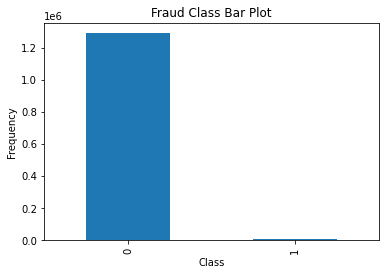

In [65]:
# Creating a Bar Chart to visualize the discrepancy for 'Class' feature having fraudulent and non-fraudulent shares
classes.plot.bar()
plt.title('Fraud Class Bar Plot')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

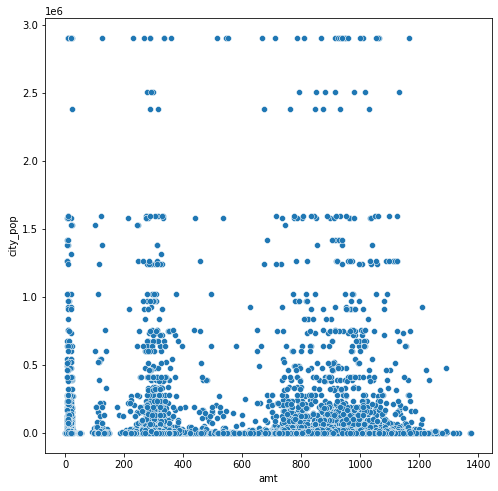

In [66]:
# Creating a scatter plot for the variables 'amt' and 'city_pop'
plt.figure(figsize = (8,8))
sns.scatterplot(data = credit_fraud[credit_fraud['is_fraud'] == 1], x = 'amt', y = 'city_pop')
plt.show()


- Seems like there is no clear correlation between Amount and city population

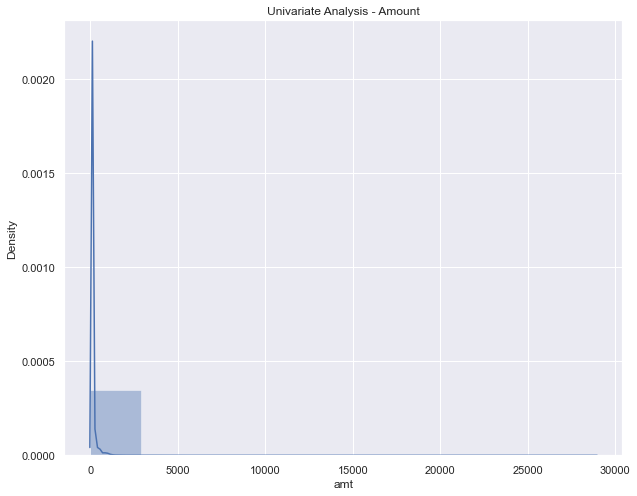

In [67]:
# Creating the Distribution plot for Amount feature
plt.figure(figsize = [10,8])
sns.set_theme()
sns.distplot(credit_fraud['amt'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

- Seems like there is some skewness in the Distplot of Amount where it is not Gaussian or Normal

In [68]:
# Treating the skewness with log transformation
credit_fraud['amt'] = np.log(credit_fraud['amt'])

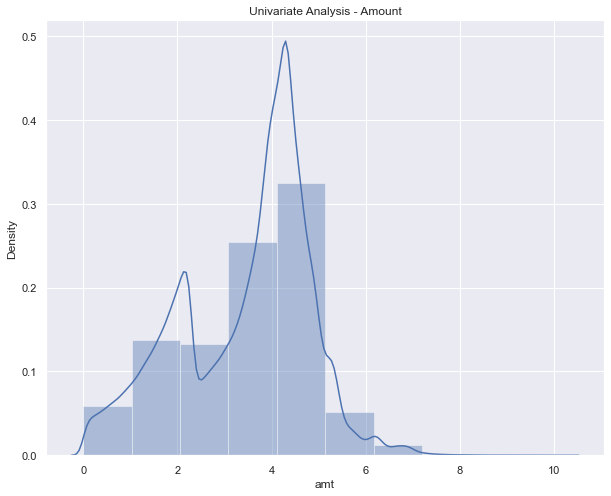

In [69]:
# Checking the Distplot again after feature transformation
plt.figure(figsize = [10,8])
sns.set_theme()
sns.distplot(credit_fraud['amt'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

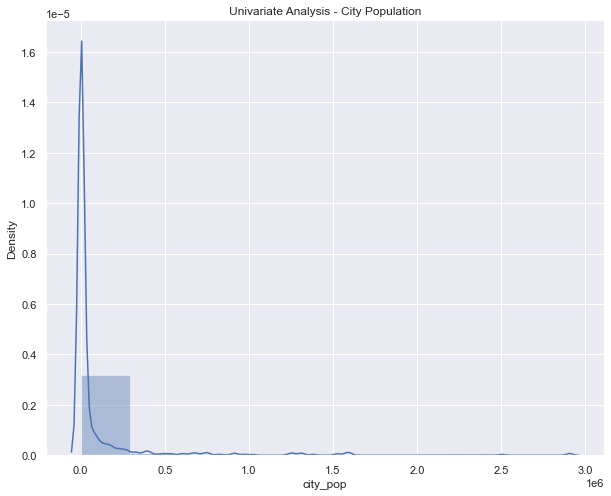

In [70]:
# Checking the DistPlot for City Population
plt.figure(figsize = [10,8])
sns.set_theme()
sns.distplot(credit_fraud['city_pop'], bins = 10, kde = True)
plt.title('Univariate Analysis - City Population')
plt.show()

- Seems like there is some skewness in the Distplot of City Population where it is not Gaussian or Normal

In [71]:
# Treating the skewness with log transformation
credit_fraud['city_pop'] = np.log(credit_fraud['city_pop'])

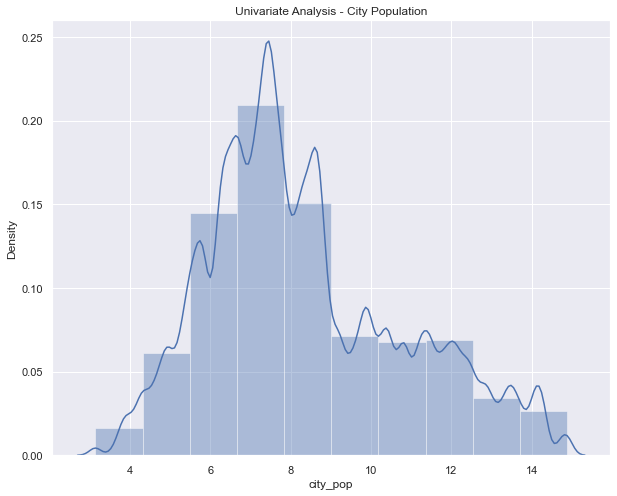

In [72]:
# Checking the Distplot again after feature transformation
plt.figure(figsize = [10,8])
sns.set_theme()
sns.distplot(credit_fraud['city_pop'], bins = 10, kde = True)
plt.title('Univariate Analysis - City Population')
plt.show()

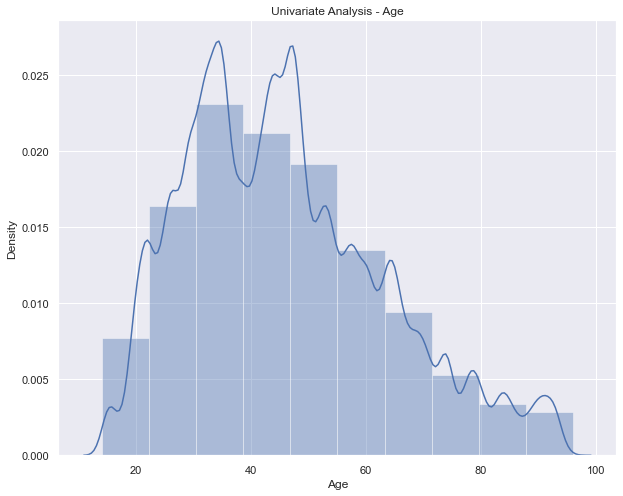

In [73]:
plt.figure(figsize = [10,8])
sns.set_theme()
sns.distplot(credit_fraud['Age'], bins = 10, kde = True)
plt.title('Univariate Analysis - Age')
plt.show()

Text(0.5, 1.0, 'Univariate Analysis - Gender Distribution')

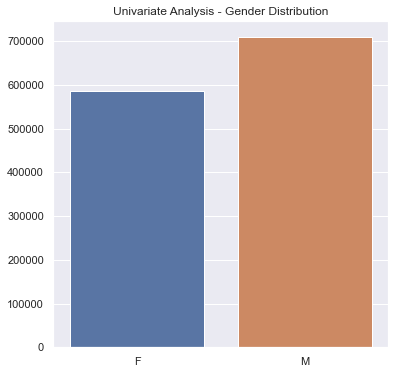

In [74]:
# Let us see the Gender distribution across the dataset

x = ['F', 'M']
y = [credit_fraud.gender.value_counts()[0], credit_fraud.gender.value_counts()[1]]

plt.figure(figsize = [6,6])
ax = sns.barplot(x = x, y = y)
plt.title('Univariate Analysis - Gender Distribution')

- There are more male customers than females.

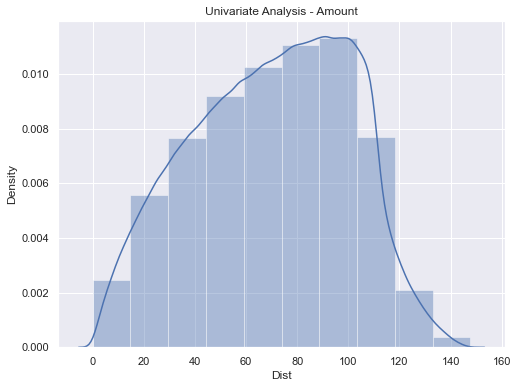

In [75]:
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(credit_fraud['Dist'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

<AxesSubplot:title={'center':'Value of Transactions by Class (Normal | Fraud)'}, xlabel='is_fraud', ylabel='amt'>

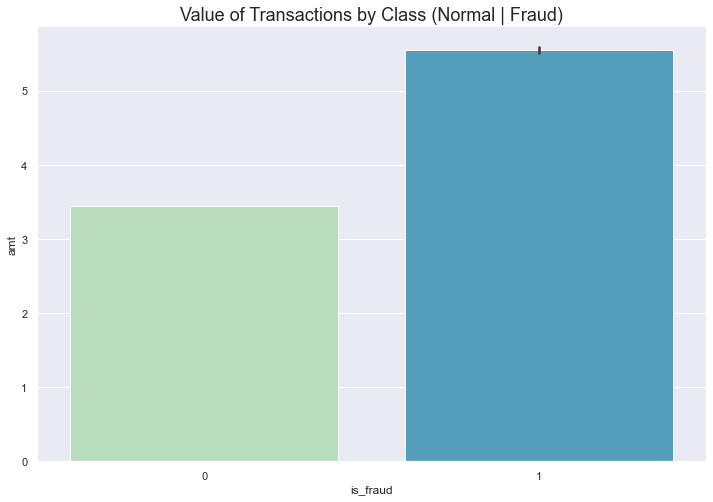

In [76]:
# Transaction Amount

plt.figure(figsize=(12,8))
plt.title('Value of Transactions by Class (Normal | Fraud)', fontsize=18)
sns.barplot(x='is_fraud', y='amt', data=credit_fraud, palette='GnBu')

- There is a great discrepancy between fraud and non-fraud cases for the Amount variable

## Step 3: Train/Test Data Split

### Standardizing the Data Set before the split

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
credit_fraud.head()

,amt,gender,city_pop,is_fraud,Age,Day_of_Week,Month,Dist
0,1.603420,1,8.159089,0,31,2,1,10.509708
1,4.674976,1,5.003946,0,41,2,1,30.171468
2,5.394127,0,8.331827,0,57,2,1,107.746268
3,3.806662,0,7.569928,0,52,2,1,97.629363
4,3.736717,0,4.595120,0,33,2,1,66.236025


In [78]:
# Splitting the data set into Feature(X) and Target(y) variables
X=credit_fraud.drop(['is_fraud'],axis=1)
y=credit_fraud['is_fraud']

In [79]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [80]:
X

,amt,gender,city_pop,Age,Day_of_Week,Month,Dist
0,1.603420,1,8.159089,31,2,1,10.509708
1,4.674976,1,5.003946,41,2,1,30.171468
2,5.394127,0,8.331827,57,2,1,107.746268
3,3.806662,0,7.569928,52,2,1,97.629363
4,3.736717,0,4.595120,33,2,1,66.236025
...,...,...,...,...,...,...,...
1296670,2.744704,0,5.552960,59,7,6,120.418199
1296671,3.945458,0,4.605170,41,7,6,40.105398
1296672,4.662778,0,6.801283,53,7,6,74.515610
1296673,4.316154,0,7.026427,40,7,6,75.717840


In [81]:
# Now splitting the data into train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,stratify=y,random_state=42)

In [82]:
y_train.shape

(1037340,)

In [83]:
X_train.shape

(1037340, 7)

In [84]:
# Checking the spread of our train/test data
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

7506
6005
1501


In [85]:
scaler= StandardScaler()

In [86]:
X_train[['amt','gender','city_pop','Age','Day_of_Week','Month','Dist']]=scaler.fit_transform(X_train[['amt','gender','city_pop','Age','Day_of_Week','Month','Dist']])

In [87]:
X_train.head()

,amt,gender,city_pop,Age,Day_of_Week,Month,Dist
509059,0.352062,0.910229,-1.681421,-1.034578,0.422626,0.543626,-1.221323
395295,-0.600996,0.910229,-0.213521,0.172296,0.877514,-0.041775,0.258278
536531,2.458332,0.910229,-1.596394,-0.632286,1.332402,0.543626,0.519431
271001,0.230439,-1.098624,-1.429483,0.402177,-1.396925,-0.334476,-0.445008
532788,0.030116,0.910229,0.184378,-1.436869,0.877514,0.543626,0.898372


In [88]:
X_test[['amt','gender','city_pop','Age','Day_of_Week','Month','Dist']]=scaler.fit_transform(X_test[['amt','gender','city_pop','Age','Day_of_Week','Month','Dist']])

In [89]:
X_test.head()

,amt,gender,city_pop,Age,Day_of_Week,Month,Dist
1161537,-1.127334,0.905121,-0.331477,1.151649,-0.486638,-0.625203,1.249362
192923,0.556448,0.905121,0.851106,0.116002,-0.941725,-0.625203,0.918120
1086283,0.973604,-1.104825,1.267149,0.518754,0.423535,-0.917373,-1.790696
1069482,0.771203,0.905121,0.669098,2.014687,0.423535,-0.917373,0.383500
689806,0.475290,0.905121,0.094616,0.518754,-1.396812,1.127819,-0.251718


### Correlation Map

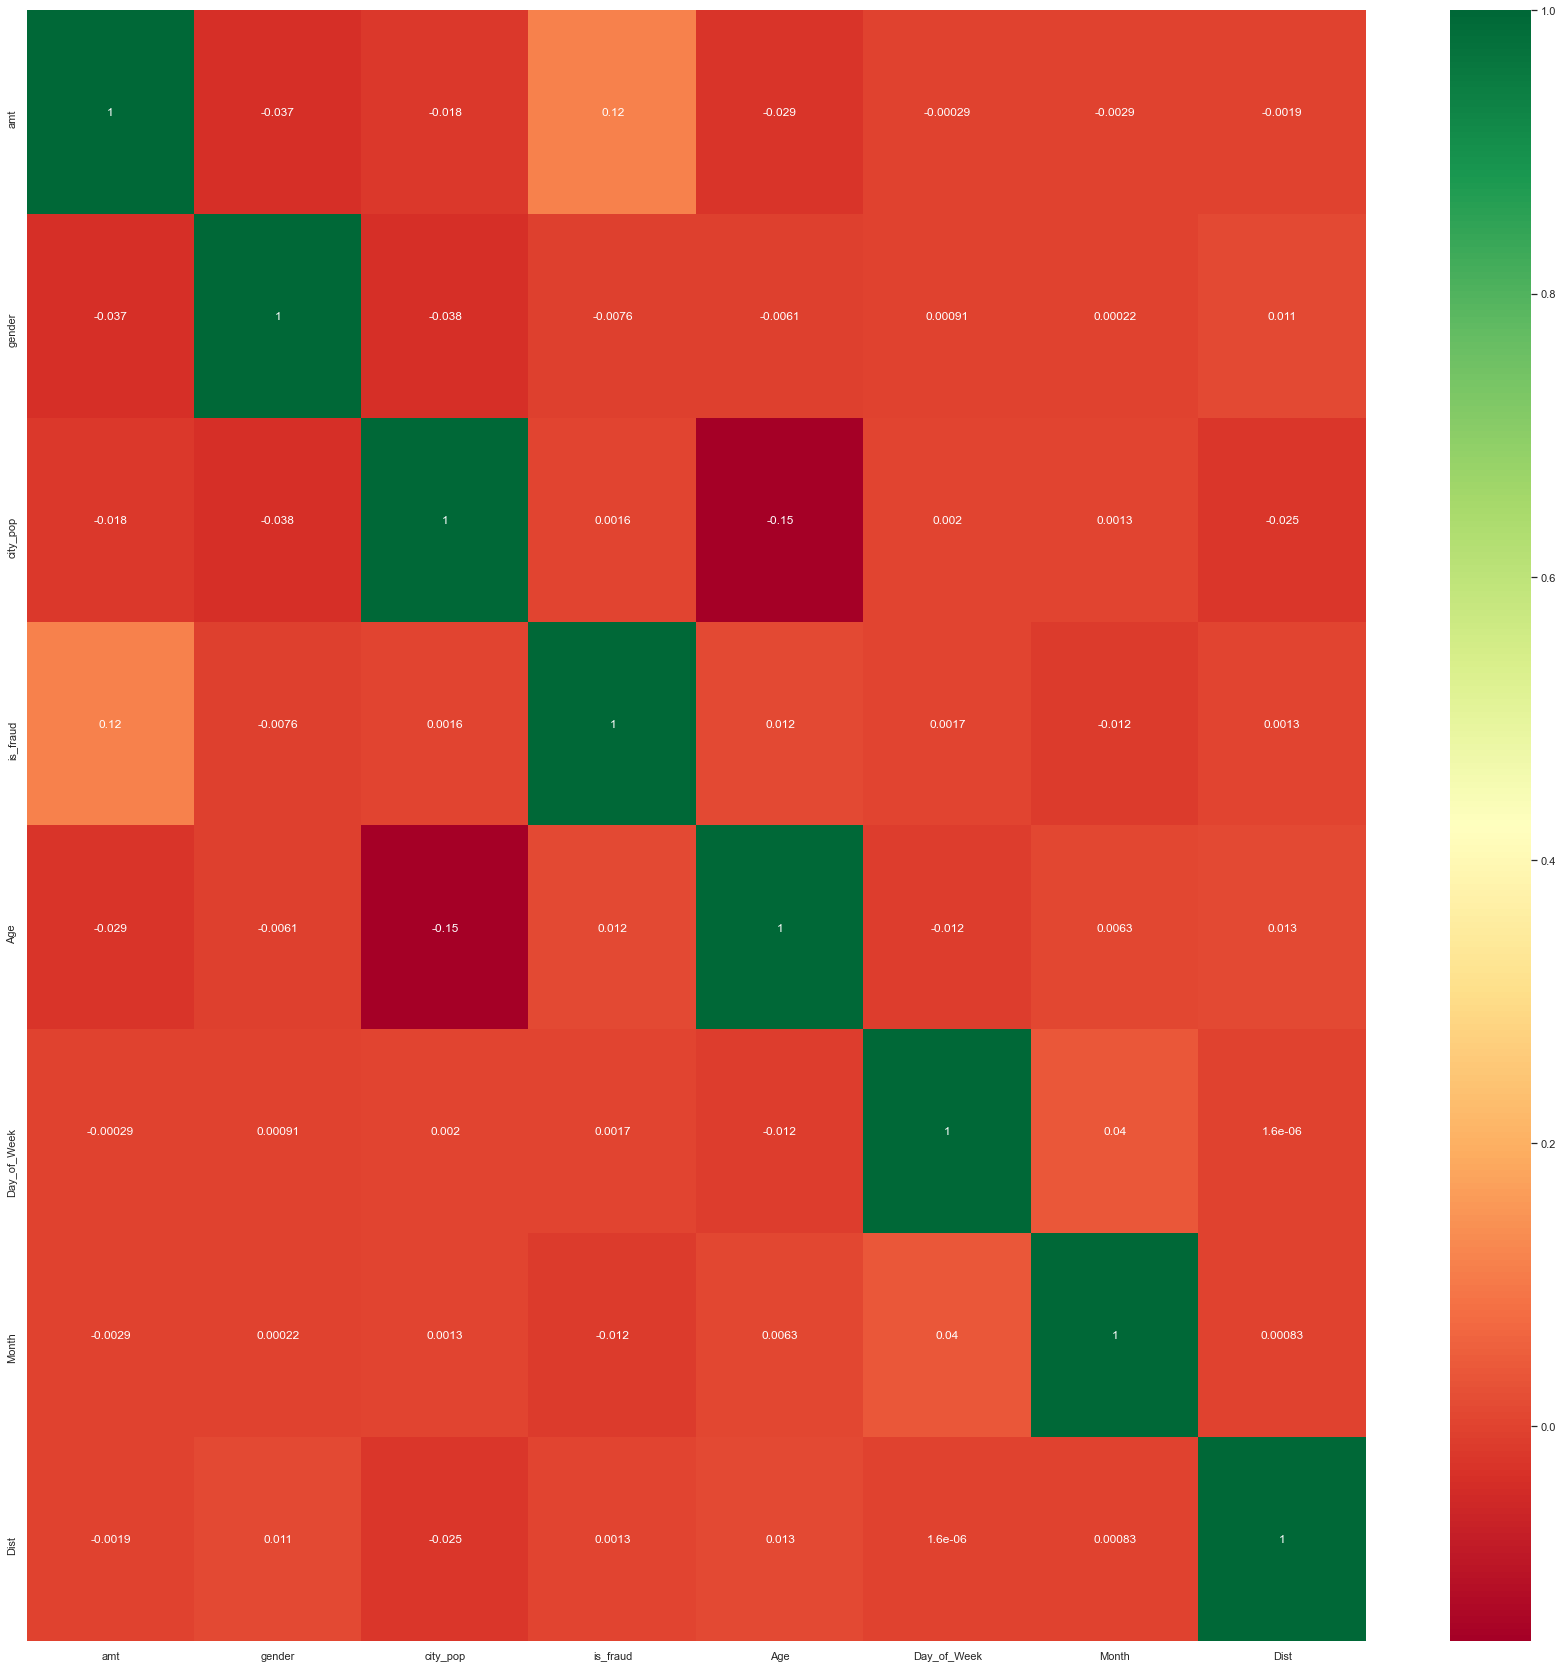

In [90]:
corrmatrix=credit_fraud.corr()
corrindex=corrmatrix.index
plt.figure(figsize=(30,30))
# Plot heat Map
sns.heatmap(credit_fraud[corrindex].corr(),annot=True,cmap='RdYlGn')
plt.show()

- From the above correlation map,the feature 'Amount' and 'is_fraud' have a correlation value of 0.12

In [91]:
X_train.describe()

,amt,gender,city_pop,Age,Day_of_Week,Month,Dist
count,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06
mean,1.357381e-15,-3.785010e-15,9.941615e-16,9.937360e-18,4.459859e-15,-1.537696e-15,-7.655195e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.491510e+00,-1.098624e+00,-2.129345e+00,-1.839160e+00,-1.396925e+00,-1.505278e+00,-2.296130e+00
25%,-8.577471e-01,-1.098624e+00,-7.124440e-01,-7.472268e-01,-9.420373e-01,-9.198767e-01,-7.704422e-01
50%,2.908607e-01,9.102294e-01,-2.249796e-01,-1.150548e-01,-3.226146e-02,-4.177503e-02,6.956597e-02
75%,6.935169e-01,9.102294e-01,6.367175e-01,6.320576e-01,8.775144e-01,8.363267e-01,8.086892e-01
max,4.872406e+00,9.102294e-01,2.660128e+00,2.873395e+00,1.332402e+00,1.714428e+00,2.554016e+00


## Step 4: Model Building & Model Evaluation

### Building the models on "Imbalanced" Dataset and observing the result

#### For Logistic Regression

In [94]:
# Logistic Regression
lr =LogisticRegression()
log_reg=lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.9939267742495228

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [97]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [98]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_1 = GridSearchCV(estimator=log_reg,
                    param_grid=params_lr,
                    cv=cv,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [99]:
%%time
grid_search_1.fit(X_train, y_train)

Fitting 30 folds for each of 7 candidates, totalling 210 fits
Wall time: 1min 23s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [100]:
grid_search_1.best_score_

0.0

In [101]:
y_test_pred=lr.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
y_train_pred=lr.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
# Probabilities 
y_proba = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_test_pred))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test, y_proba)))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



AUC: 0.8387687837637319 %
Precision-Recall: 0.19932396909828176


In [104]:

    print('Train set performance:')
    print(metrics.recall_score(y_train, y_train_pred))
    print(metrics.confusion_matrix(y_train, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

Train set performance:
0.0
[[1031032     303]
 [   6005       0]]
-------------------------
Test set performance:
0.0
[[257760     74]
 [  1501      0]]


#### ROC Curve

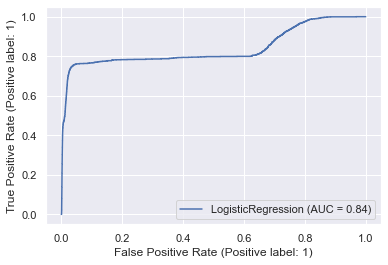

In [105]:
metrics.plot_roc_curve(log_reg, X_test, y_test)

In [106]:
# Using cross validation(cv) score
from sklearn.model_selection import cross_val_score

In [107]:
# Using cv score for logistic Regression with Hyperparameters
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, y_train,cv=10)

array([0.99401353, 0.99394605, 0.99398461, 0.99384965, 0.99395569,
       0.99403281, 0.99391713, 0.99384965, 0.99380145, 0.99382073])

In [108]:
# Using cv score for logistic Regression without Hyperparameters
cross_val_score(LogisticRegression(), X_train, y_train,cv=10)

array([0.99401353, 0.99394605, 0.99398461, 0.99384965, 0.99395569,
       0.99403281, 0.99391713, 0.99384965, 0.99380145, 0.99382073])

#### For Random Forest Classifier

In [109]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


In [110]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9956581255904525

In [111]:
y_test_rfpred=rf.predict(X_test)
y_test_rfpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
y_train_rfpred=rf.predict(X_train)
y_train_rfpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
print('Train set performance:')
print(metrics.recall_score(y_train, y_train_rfpred))
print(metrics.confusion_matrix(y_train, y_train_rfpred))
print("-"*25)
print('Test set performance:')
print(metrics.recall_score(y_test, y_test_rfpred))
print(metrics.confusion_matrix(y_test, y_test_rfpred))

Train set performance:
0.9042464612822648
[[1031322      13]
 [    575    5430]]
-------------------------
Test set performance:
0.3530979347101932
[[257679    155]
 [   971    530]]


In [114]:
# Probabilities 
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_test_rfpred))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test, y_proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.77      0.35      0.48      1501

    accuracy                           1.00    259335
   macro avg       0.88      0.68      0.74    259335
weighted avg       0.99      1.00      0.99    259335



AUC: 0.8888565267220749 %
Precision-Recall: 0.5229873795922494


In [116]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [117]:
# Using cv score for Random Forest Classifier
cross_val_score(RandomForestClassifier(n_estimators=10),X_train,y_train,cv=cv)

array([0.9957873 , 0.99592226, 0.99568126, 0.99570054, 0.99586442,
       0.99563306, 0.99575838, 0.99572946, 0.9957391 , 0.9958355 ,
       0.99603794, 0.99576802, 0.9956427 , 0.99589334, 0.99548846,
       0.99567162, 0.99553666, 0.99584514, 0.99581622, 0.99551738,
       0.99565234, 0.99590298, 0.9958837 , 0.9956427 , 0.99568126,
       0.99582586, 0.9958837 , 0.99590298, 0.9958355 , 0.99582586])

#### For XGBoost

In [118]:
# Using XGBoost
from xgboost import XGBClassifier

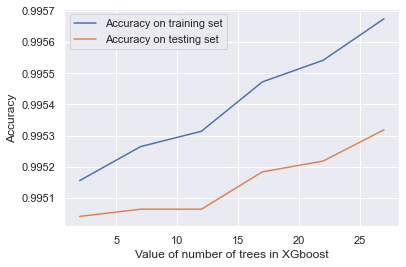

In [119]:
# Finding the best number of estimators for XGBoost
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

### The best no. of trees is 27 for XGBoost

In [157]:
xgb=XGBClassifier(n_estimators=27,eval_metric='aucpr')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='aucpr', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=27, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [158]:
xgb.score(X_test,y_test)

0.9953187961516957

In [159]:
y_test_predxgb=xgb.predict(X_test)
y_test_predxgb

array([0, 0, 0, ..., 0, 0, 0])

In [160]:
y_train_predxgb=xgb.predict(X_train)
y_train_predxgb

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
print('Train set performance:')
print(metrics.recall_score(y_train, y_train_predxgb))
print(metrics.confusion_matrix(y_train, y_train_predxgb))
print("-"*25)
print('Test set performance:')
print(metrics.recall_score(y_test, y_test_predxgb))
print(metrics.confusion_matrix(y_test, y_test_predxgb))

Train set performance:
0.3638634471273938
[[1030668     667]
 [   3820    2185]]
-------------------------
Test set performance:
0.31645569620253167
[[257646    188]
 [  1026    475]]


In [162]:
# Probabilities 
y_proba = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_test_predxgb ))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test, y_proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.72      0.32      0.44      1501

    accuracy                           1.00    259335
   macro avg       0.86      0.66      0.72    259335
weighted avg       0.99      1.00      0.99    259335



AUC: 0.970644175269653 %
Precision-Recall: 0.5131018983012771


In [163]:
# Using cv score for XGBoost Classifier
cross_val_score(XGBClassifier(n_estimators=10),X_train,y_train,cv=cv)

array([0.99536314, 0.99527638, 0.9952089 , 0.99508358, 0.99515106,
       0.99509322, 0.99521854, 0.9950643 , 0.99524746, 0.99497754,
       0.9953053 , 0.9953053 , 0.99517034, 0.99502574, 0.99523782,
       0.99497754, 0.99532458, 0.99534386, 0.99503538, 0.99495826,
       0.99509322, 0.99527638, 0.99539206, 0.99494862, 0.99495826,
       0.9951125 , 0.99544026, 0.9951125 , 0.99510286, 0.99524746])

#### These 3 Models(Random forest, XGBoost and Logistic Regression) have given zero or low recall value, since the data itself is Imbalanced, we can never figure out the few fraud cases from the non-fraud cases that are large in number. 

### So, we go ahead and handle the Imbalanced dataset using "Under Sampling" Technique

In [127]:
# Importing under Sampling libraries
from imblearn.under_sampling import NearMiss

In [128]:
# Now Implementing Under Sampling for Handling Imbalanced Data set(X_train)
nm= NearMiss(version=1,n_neighbors=3)
X_bal,y_bal=nm.fit_resample(X_train,y_train)

In [129]:
X_test_bal,y_test_bal=nm.fit_resample(X_test,y_test)

In [130]:
X_test_bal.shape,y_test_bal.shape

((3002, 7), (3002,))

In [131]:
 X_bal.shape,y_bal.shape

((12010, 7), (12010,))

In [132]:
from collections import Counter
print('Original data set shape {}'.format(Counter(y_train)))
print('Resampled data set shape {}'.format(Counter(y_bal)))

Original data set shape Counter({0: 1031335, 1: 6005})
Resampled data set shape Counter({0: 6005, 1: 6005})


### Now Building the models on "Balanced" Dataset and observing the result

### Using Under Sampling Technique for Handling Imbalanced Data Set

#### For Logistic Regression

In [133]:
# Using Under Sampled Data set for Logistic Regression
lr2 =LogisticRegression()
undsamp_lrmodel=lr2.fit(X_bal,y_bal)
lr2.score(X_test_bal,y_test_bal)


0.6718854097268487

In [135]:
y_test_predlog1=lr2.predict(X_test_bal)
y_test_predlog1

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [136]:
y_train_predlog1=lr2.predict(X_bal)
y_train_predlog1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [137]:
def evaluate_model_lr_undsamp(classifier):
    y_train_pred = classifier.predict(X_bal)
    y_test_pred = classifier.predict(X_test_bal)
    
    print('Train set performance:')
    print(metrics.recall_score(y_bal, y_train_pred))
    print(metrics.confusion_matrix(y_bal, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_bal, y_test_pred))
    print(metrics.confusion_matrix(y_test_bal, y_test_pred))

In [138]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_30 = GridSearchCV(estimator=undsamp_lrmodel,
                    param_grid=params_lr,
                    cv=cv,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [139]:
%%time
grid_search_30.fit(X_bal,y_bal)

Fitting 30 folds for each of 7 candidates, totalling 210 fits
Wall time: 2.84 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [140]:
undsamp_lr=grid_search_30.best_estimator_
evaluate_model_lr_undsamp(undsamp_lr)

Train set performance:
0.7440466278101582
[[4221 1784]
 [1537 4468]]
-------------------------
Test set performance:
0.7501665556295802
[[ 889  612]
 [ 375 1126]]


In [141]:
# Probabilities 
y_proba = lr2.predict_proba(X_test_bal)[:,1]

print(classification_report(y_test_bal, y_test_predlog1))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_bal, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_bal, y_proba)))

              precision    recall  f1-score   support

           0       0.70      0.60      0.65      1501
           1       0.65      0.74      0.69      1501

    accuracy                           0.67      3002
   macro avg       0.68      0.67      0.67      3002
weighted avg       0.68      0.67      0.67      3002



AUC: 0.7531656665931351 %
Precision-Recall: 0.7682683529591798


In [142]:
# Using cross validation on Logistic Regression 
lr_accuracy= cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_bal, y_bal,cv=cv)
lr_accuracy

array([0.73355537, 0.73522065, 0.71357202, 0.71690258, 0.73771857,
       0.71273938, 0.73438801, 0.69525396, 0.70358035, 0.73022481,
       0.72189842, 0.68193172, 0.73105745, 0.73355537, 0.69941715,
       0.74354704, 0.72939217, 0.7235637 , 0.7194005 , 0.72689425,
       0.70358035, 0.7235637 , 0.71856786, 0.73022481, 0.7152373 ,
       0.72273106, 0.72689425, 0.72772689, 0.71773522, 0.72689425])

In [143]:
lr_accuracy.mean()

0.7212323064113239

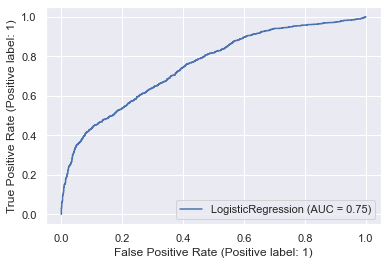

In [144]:
metrics.plot_roc_curve(undsamp_lrmodel,X_test_bal,y_test_bal)

#### For Random Forest Classifier

In [145]:
# Using Under Sampling technique for Random Forest Classifier
rf2 = RandomForestClassifier(n_estimators=10,random_state=42)
undsamp_rfmodel=rf2.fit(X_bal, y_bal)
rf2.score(X_test_bal, y_test_bal)

0.8281145902731513

In [146]:
y_test_predrf1=rf2.predict(X_test_bal)
y_test_predrf1

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [147]:
y_train_predrf1=rf2.predict(X_bal)
y_train_predrf1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [164]:
def evaluate_model_rf_undsamp(classifier):
    y_train_pred = classifier.predict(X_bal)
    y_test_pred = classifier.predict(X_test_bal)
    
    print('Train set performance:')
    print(metrics.recall_score(y_bal, y_train_pred))
    print(metrics.confusion_matrix(y_bal, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_bal, y_test_pred))
    print(metrics.confusion_matrix(y_test_bal, y_test_pred))

In [165]:
params = {
    'max_depth': [7,10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_31 = GridSearchCV(estimator=undsamp_rfmodel,
                    param_grid=params,
                    cv=cv,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [166]:
%%time
grid_search_31.fit(X_bal,y_bal)

Fitting 30 folds for each of 12 candidates, totalling 360 fits
Wall time: 8.72 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 10],
                         'min_samples_leaf': [50, 80],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [167]:
undsamp_rf=grid_search_31.best_estimator_
evaluate_model_rf_undsamp(undsamp_rf)

Train set performance:
0.8263114071606994
[[4988 1017]
 [1043 4962]]
-------------------------
Test set performance:
0.82145236508994
[[1234  267]
 [ 268 1233]]


In [168]:
# Probabilities 
y_proba = rf2.predict_proba(X_test_bal)[:,1]

print(classification_report(y_test_bal, y_test_predrf1))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_bal, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_bal, y_proba)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1501
           1       0.82      0.85      0.83      1501

    accuracy                           0.83      3002
   macro avg       0.83      0.83      0.83      3002
weighted avg       0.83      0.83      0.83      3002



AUC: 0.9036196610653968 %
Precision-Recall: 0.8833387955121403


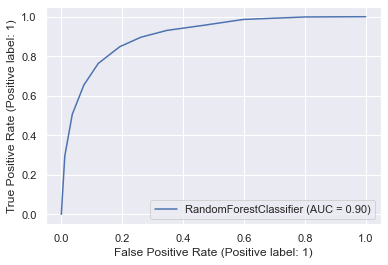

In [169]:
metrics.plot_roc_curve(undsamp_rfmodel,X_test_bal,y_test_bal)

In [173]:
# Using cv score for Random Forest Classifier
rf_accuracy=cross_val_score(RandomForestClassifier(n_estimators=10,random_state=42),X_bal,y_bal,cv=cv)
rf_accuracy

array([0.83930058, 0.84512906, 0.82764363, 0.81515404, 0.83180683,
       0.82348043, 0.83014155, 0.82264779, 0.82681099, 0.83180683,
       0.82098251, 0.82514571, 0.82098251, 0.84346378, 0.81598668,
       0.8143214 , 0.82014988, 0.84346378, 0.82514571, 0.83263947,
       0.82514571, 0.8376353 , 0.80849292, 0.84929226, 0.83597002,
       0.82764363, 0.84512906, 0.83597002, 0.82764363, 0.8459617 ])

In [175]:
rf_accuracy.mean()

0.8298362475714682

#### For XGBoost

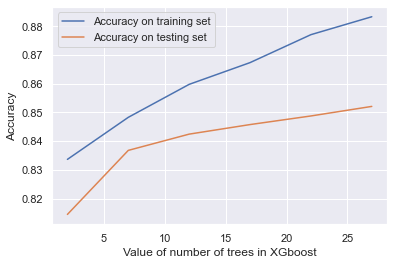

In [176]:

# Finding the best number of estimators for XGBoost
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_bal,y_bal)
    score1.append(xgb.score(X_bal,y_bal))
    score2.append(xgb.score(X_test_bal,y_test_bal))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [177]:
# The No. of trees would be 26
xgb2=XGBClassifier(n_estimators=26)
xgb_undsamp=xgb2.fit(X_bal,y_bal,eval_metric='aucpr')

In [178]:
xgb2.score(X_test_bal,y_test_bal)

0.8494337108594271

In [179]:
y_test_predxgb1=xgb2.predict(X_test_bal)
y_test_predxgb1

array([0, 0, 0, ..., 0, 0, 1])

In [180]:
y_train_predxgb1=xgb2.predict(X_bal)
y_train_predxgb1

array([0, 0, 0, ..., 0, 1, 1])

In [181]:
def evaluate_model_xgb_undsamp(classifier):
    y_train_pred = classifier.predict(X_bal)
    y_test_pred = classifier.predict(X_test_bal)
    
    print('Train set performance:')
    print(metrics.recall_score(y_bal, y_train_pred))
    print(metrics.confusion_matrix(y_bal, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_bal, y_test_pred))
    print(metrics.confusion_matrix(y_test_bal, y_test_pred))

In [182]:
params = {
    'max_depth': [10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [15,30],
    'learning_rate': [0.1]
}

grid_search_32 = GridSearchCV(estimator=xgb_undsamp,
                    param_grid=params,
                    cv=cv,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [183]:
%%time
grid_search_32.fit(X_bal,y_bal)

Fitting 30 folds for each of 4 candidates, totalling 120 fits
[04:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Wall time: 11.3 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interacti...
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=26,
                              

In [184]:
undsamp_xg=grid_search_32.best_estimator_
evaluate_model_xgb_undsamp(undsamp_xg)

Train set performance:
0.9064113238967527
[[5611  394]
 [ 562 5443]]
-------------------------
Test set performance:
0.8520986009327115
[[1261  240]
 [ 222 1279]]


In [185]:
# Probabilities 
y_proba = xgb2.predict_proba(X_test_bal)[:,1]

print(classification_report(y_test_bal, y_test_predxgb1))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_bal, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_bal, y_proba)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1501
           1       0.84      0.86      0.85      1501

    accuracy                           0.85      3002
   macro avg       0.85      0.85      0.85      3002
weighted avg       0.85      0.85      0.85      3002



AUC: 0.9201582689044523 %
Precision-Recall: 0.9180015259710509


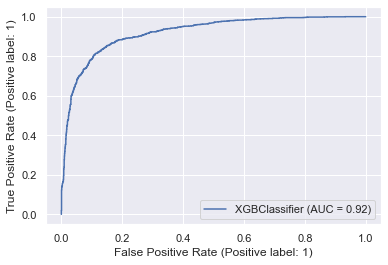

In [186]:
metrics.plot_roc_curve(xgb_undsamp,X_test_bal,y_test_bal)

In [187]:
# Using cv score for XGBoost Classifier
xgb_accuracy=cross_val_score(XGBClassifier(n_estimators=300),X_bal,y_bal,cv=cv)
xgb_accuracy

array([0.86761032, 0.87260616, 0.86094921, 0.86094921, 0.87427144,
       0.88426311, 0.8692756 , 0.84679434, 0.86511241, 0.88426311,
       0.85845129, 0.86511241, 0.87676936, 0.86261449, 0.87177352,
       0.8692756 , 0.86261449, 0.88093256, 0.86511241, 0.86844296,
       0.85845129, 0.86511241, 0.86761032, 0.87510408, 0.87260616,
       0.86844296, 0.88509575, 0.86427977, 0.8692756 , 0.87094088])

In [188]:
xgb_accuracy.mean()

0.868803774632251

### Using "Oversampling" Technique for Handling Imbalanced Data Set

In [189]:
# Importing libraries for Over Sampling Technique
from imblearn.over_sampling import RandomOverSampler

In [190]:
# Randomly over sample the minority class for training set
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 1031335), (1, 1031335)]


In [191]:
# Randomly over sample the minority class for testing set
ros = RandomOverSampler(random_state=42)
X_test_ros, y_test_ros= ros.fit_resample(X_test, y_test)
# Check the number of records after over sampling
print(sorted(Counter(y_test_ros).items()))

[(0, 257834), (1, 257834)]


#### For Logistic Regression

In [192]:
# Train the Logistic Regression model
lr3 = LogisticRegression()
ros_lrmodel=lr3.fit(X_train_ros, y_train_ros)
lr3.score(X_test_ros,y_test_ros)

0.7890949215386645

In [193]:
y_test_predlog2=lr3.predict(X_test_ros)
y_test_predlog2

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [194]:
y_train_predlog2=lr3.predict(X_train_ros)
y_train_predlog2

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [195]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_10 = GridSearchCV(estimator=ros_lrmodel,
                    param_grid=params_lr,
                    cv=cv,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [196]:
%%time
grid_search_10.fit(X_train_ros, y_train_ros)

Fitting 30 folds for each of 7 candidates, totalling 210 fits
Wall time: 1min 59s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [200]:
def evaluate_model_lr_ros(classifier):
    y_train_pred = classifier.predict(X_train_ros)
    y_test_pred = classifier.predict(X_test_ros)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train_ros, y_train_pred))
    print(metrics.confusion_matrix(y_train_ros, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_ros, y_test_pred))
    print(metrics.confusion_matrix(y_test_ros, y_test_pred))  

In [201]:
lr_ros = grid_search_10.best_estimator_
evaluate_model_lr_ros(lr_ros)

Train set performance:
0.7738979090208322
[[822178 209157]
 [233187 798148]]
-------------------------
Test set performance:
0.78142137964737
[[205431  52403]
 [ 56357 201477]]


In [202]:
# Probabilities 
y_proba = lr3.predict_proba(X_test_ros)[:,1]

print(classification_report(y_test_ros, y_test_predlog2))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_ros, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_ros, y_proba)))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79    257834
           1       0.79      0.78      0.79    257834

    accuracy                           0.79    515668
   macro avg       0.79      0.79      0.79    515668
weighted avg       0.79      0.79      0.79    515668



AUC: 0.8394349753737822 %
Precision-Recall: 0.8858356504606003


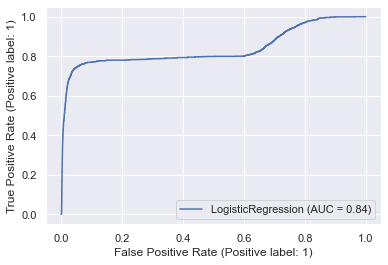

In [203]:
metrics.plot_roc_curve(lr3.fit(X_train_ros,y_train_ros), X_test, y_test)

In [204]:
lr_accuracy2=cross_val_score(LogisticRegression(random_state=42),X_train_ros,y_train_ros,cv=cv)
lr_accuracy2

array([0.78496318, 0.78576796, 0.78611702, 0.78554495, 0.78612187,
       0.78493409, 0.78557889, 0.78715936, 0.78544799, 0.78438626,
       0.78565161, 0.78585038, 0.78473532, 0.7869412 , 0.78627701,
       0.78751812, 0.78506499, 0.78492439, 0.78560797, 0.78356208,
       0.78640306, 0.7850359 , 0.78559343, 0.78553525, 0.78521528,
       0.78531709, 0.78634973, 0.78365904, 0.78650487, 0.78670364])

In [205]:
lr_accuracy2.mean()

0.785615731067015

#### For Random Forest Classifier

In [206]:
# Train the random forest model
rf3 = RandomForestClassifier(random_state=42)
ros_rfmodel=rf3.fit(X_train_ros, y_train_ros)
rf3.score(X_test_ros,y_test_ros)

0.7609973859149686

In [207]:
y_train_predrf2=rf3.predict(X_train_ros)
y_train_predrf2

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [208]:
y_test_predrf2=rf3.predict(X_test_ros)
y_test_predrf2

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [211]:
params = {
    'max_depth': [7,10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_11 = GridSearchCV(estimator=ros_rfmodel,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [212]:
%%time
grid_search_11.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 13min 36s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 10],
                         'min_samples_leaf': [50, 80],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [213]:
def evaluate_model_rf_ros(classifier):
    y_train_pred = classifier.predict(X_train_ros)
    y_test_pred = classifier.predict(X_test_ros)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train_ros, y_train_pred))
    print(metrics.confusion_matrix(y_train_ros, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_ros, y_test_pred))
    print(metrics.confusion_matrix(y_test_ros, y_test_pred))

In [214]:
rf_ros = grid_search_11.best_estimator_
evaluate_model_rf_ros(rf_ros)

Train set performance:
0.8964681698962994
[[990555  40780]
 [106776 924559]]
-------------------------
Test set performance:
0.8369493550113639
[[247635  10199]
 [ 42040 215794]]


In [216]:
# Probabilities 
y_proba = rf3.predict_proba(X_test_ros)[:,1]

print(classification_report(y_test_ros, y_test_predrf2))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_ros, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_ros, y_proba)))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81    257834
           1       1.00      0.52      0.69    257834

    accuracy                           0.76    515668
   macro avg       0.84      0.76      0.75    515668
weighted avg       0.84      0.76      0.75    515668



AUC: 0.9613817417919545 %
Precision-Recall: 0.9628146380090092


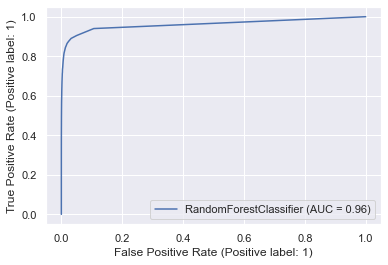

In [217]:
metrics.plot_roc_curve(ros_rfmodel, X_test, y_test)

#### For XGBoost Classifier

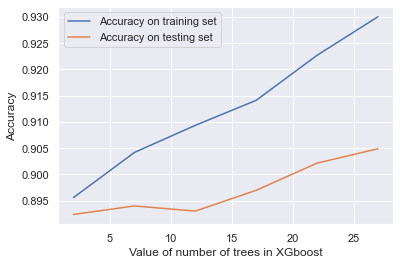

In [218]:
# Finding the best number of estimators for XGBoost for Over Sampled Data Sets
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_ros,y_train_ros)
    score1.append(xgb.score(X_train_ros,y_train_ros))
    score2.append(xgb.score(X_test_ros,y_test_ros))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [219]:
# Training the XG Boost Classifier for the number of trees equal to 27
xgb3=XGBClassifier(n_estimators=27)
ros_xgbmodel=xgb3.fit(X_train_ros,y_train_ros)

In [220]:
xgb3.score(X_test_ros,y_test_ros)

0.9048961735069851

In [221]:
y_test_predxgb2=xgb3.predict(X_test_ros)
y_test_predxgb2

array([0, 0, 0, ..., 1, 1, 1])

In [222]:
y_train_predxgb2=xgb3.predict(X_train_ros)
y_train_predxgb2

array([0, 0, 1, ..., 1, 1, 1])

In [223]:
params = {
    'max_depth': [10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [15,30],
    'learning_rate': [0.1]
}

grid_search_12 = GridSearchCV(estimator=ros_xgbmodel,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [224]:
%%time
grid_search_12.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[05:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Wall time: 8min 11s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=27,
                              

In [227]:
def evaluate_model_xgb_ros(classifier):
    y_train_pred = classifier.predict(X_train_ros)
    y_test_pred = classifier.predict(X_test_ros)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train_ros, y_train_pred))
    print(metrics.confusion_matrix(y_train_ros, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_ros, y_test_pred))
    print(metrics.confusion_matrix(y_test_ros, y_test_pred))

In [228]:
xgb_ros = grid_search_12.best_estimator_
evaluate_model_xgb_ros(xgb_ros)

Train set performance:
0.9765090877357987
[[ 972839   58496]
 [  24227 1007108]]
-------------------------
Test set performance:
0.8338698542473064
[[243099  14735]
 [ 42834 215000]]


In [229]:
# Probabilities 
y_proba = xgb3.predict_proba(X_test_ros)[:,1]

print(classification_report(y_test_ros, y_test_predxgb2))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_ros, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_ros, y_proba)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91    257834
           1       0.92      0.88      0.90    257834

    accuracy                           0.90    515668
   macro avg       0.91      0.90      0.90    515668
weighted avg       0.91      0.90      0.90    515668



AUC: 0.9714623608912879 %
Precision-Recall: 0.9725227800779823


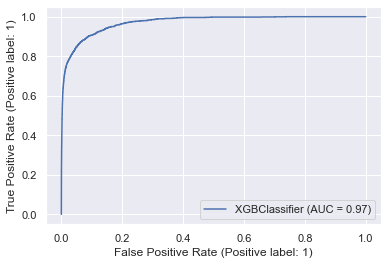

In [230]:
metrics.plot_roc_curve(ros_xgbmodel, X_test, y_test)

### Applying the SMOTE Technique for Handling the Imbalanced Data Set

In [231]:
from imblearn.over_sampling import SMOTE

In [232]:
sm =SMOTE(sampling_strategy='minority',random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

#### For Logistic Regression

In [233]:
# Using SMOTE data set for Logistic Regression
lr4=LogisticRegression()
smote_lrmodel=lr4.fit(X_train_smote,y_train_smote)


In [234]:
sm =SMOTE(sampling_strategy='minority',random_state=42)
X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)

In [235]:
# Checking the accuracy score for Testing Data Set
lr4.score(X_test_smote,y_test_smote)

0.7929346013326404

In [236]:
y_test_predlog3=lr4.predict(X_test_smote)
y_test_predlog3

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [237]:
y_train_predlog3=lr4.predict(X_train_smote)
y_train_predlog3

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [238]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_2 = GridSearchCV(estimator=smote_lrmodel,
                    param_grid=params_lr,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [239]:
%%time
grid_search_2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Wall time: 19.3 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [240]:
def evaluate_model_lr_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote)
    y_test_pred = classifier.predict(X_test_smote)   
    
    print('Train set performance:')
    print(metrics.recall_score(y_train_smote, y_train_pred))
    print(metrics.confusion_matrix(y_train_smote, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_smote, y_test_pred))
    print(metrics.confusion_matrix(y_test_smote, y_test_pred))

In [241]:
lr_smote = grid_search_2.best_estimator_
evaluate_model_lr_smote(lr_smote)

Train set performance:
0.7763083770065012
[[825684 205651]
 [230701 800634]]
-------------------------
Test set performance:
0.7858350721782232
[[206271  51563]
 [ 55219 202615]]


In [242]:
# Probabilities 
y_proba = lr4.predict_proba(X_test_smote)[:,1]

print(classification_report(y_test_smote, y_test_predlog3))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_smote, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_smote, y_proba)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79    257834
           1       0.80      0.79      0.79    257834

    accuracy                           0.79    515668
   macro avg       0.79      0.79      0.79    515668
weighted avg       0.79      0.79      0.79    515668



AUC: 0.8417367985294697 %
Precision-Recall: 0.887212048430301


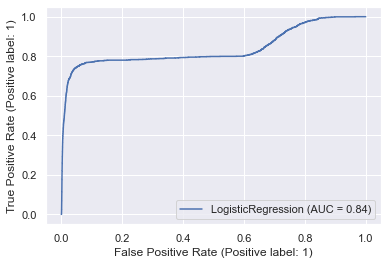

In [243]:
metrics.plot_roc_curve(lr4.fit(X_train_smote,y_train_smote), X_test, y_test)

#### For Random Forest Classifier

In [244]:
# Using SMOTE Data Set for Random Forest
rf4 = RandomForestClassifier(random_state=42)
smote_rfmodel = rf4.fit(X_train_smote, y_train_smote)


In [245]:
rf4.score(X_test_smote,y_test_smote)

0.8399125018422706

In [246]:
y_test_predrf3=rf4.predict(X_test_smote)
y_test_predrf3

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [247]:
y_train_predrf3=rf4.predict(X_train_smote)
y_train_predrf3

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [248]:
params = {
    'max_depth': [7,10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_3 = GridSearchCV(estimator=smote_rfmodel,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [249]:
%%time
grid_search_3.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 11min 34s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 10],
                         'min_samples_leaf': [50, 80],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [250]:
def evaluate_model_rf_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote)
    y_test_pred = classifier.predict(X_test_smote)  
    print('Train set performance:')
    print(metrics.recall_score(y_train_smote, y_train_pred))
    print(metrics.confusion_matrix(y_train_smote, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_smote, y_test_pred))
    print(metrics.confusion_matrix(y_test_smote, y_test_pred))

In [251]:
rf_smote = grid_search_3.best_estimator_
evaluate_model_rf_smote(rf_smote)

Train set performance:
0.8951776096030872
[[995935  35400]
 [108107 923228]]
-------------------------
Test set performance:
0.9161902619514881
[[191384  66450]
 [ 21609 236225]]


In [252]:
# Probabilities 
y_proba = rf4.predict_proba(X_test_smote)[:,1]

print(classification_report(y_test_smote, y_test_predrf3))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_smote, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_smote, y_proba)))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83    257834
           1       0.79      0.92      0.85    257834

    accuracy                           0.84    515668
   macro avg       0.85      0.84      0.84    515668
weighted avg       0.85      0.84      0.84    515668



AUC: 0.9466948654267966 %
Precision-Recall: 0.9522634900549045


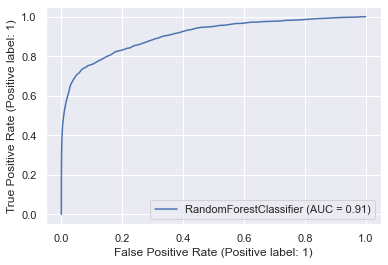

In [253]:
metrics.plot_roc_curve(smote_rfmodel, X_test, y_test)

#### For XGBoost

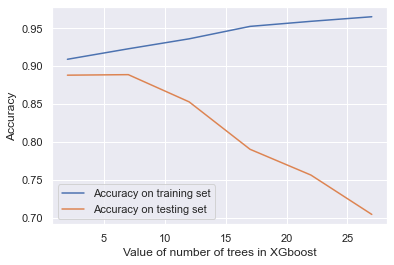

In [254]:
# Finding the best number of estimators for XGBoost for SMOTE Data Sets
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_smote,y_train_smote)
    score1.append(xgb.score(X_train_smote,y_train_smote))
    score2.append(xgb.score(X_test_smote,y_test_smote))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [255]:
# Training the XG Boost Classifier for SMOTE DATA SETS for no. of trees=7
xgb4=XGBClassifier(n_estimators=7)
smote_xgbmodel=xgb4.fit(X_train_smote,y_train_smote)

In [256]:
xgb4.score(X_test_smote,y_test_smote)

0.8886357113491626

In [257]:
y_test_predxgb3=xgb4.predict(X_test_smote)
y_test_predxgb3

array([0, 0, 0, ..., 1, 1, 1])

In [258]:
y_train_predxgb3=xgb4.predict(X_train_smote)
y_train_predxgb3

array([0, 0, 1, ..., 1, 1, 1])

In [259]:
params = {
    'max_depth': [10],
    'min_samples_leaf': [50,80],
    'criterion': ['gini'],
    'n_estimators': [15,30],
    'learning_rate': [0.1]
}

grid_search_4 = GridSearchCV(estimator=smote_xgbmodel,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [260]:
%%time
grid_search_4.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[06:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Wall time: 11min 15s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=7,
                              

In [261]:
grid_search_4.best_params_

{'criterion': 'gini',
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_leaf': 50,
 'n_estimators': 30}

In [262]:
def evaluate_model_xgb_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote)
    y_test_pred = classifier.predict(X_test_smote)  
    print('Train set performance:')
    print(metrics.recall_score(y_train_smote, y_train_pred))
    print(metrics.confusion_matrix(y_train_smote, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test_smote, y_test_pred))
    print(metrics.confusion_matrix(y_test_smote, y_test_pred))

In [263]:
xgb_smote = grid_search_4.best_estimator_
evaluate_model_xgb_smote(xgb_smote)

Train set performance:
0.9629499629121478
[[1000283   31052]
 [  38211  993124]]
-------------------------
Test set performance:
0.9600944793937184
[[202063  55771]
 [ 10289 247545]]


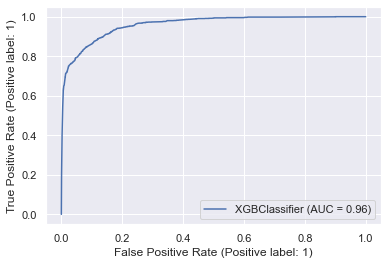

In [264]:
metrics.plot_roc_curve(smote_xgbmodel, X_test, y_test)

In [265]:
# Probabilities 
y_proba = xgb4.predict_proba(X_test_smote)[:,1]

print(classification_report(y_test_smote, y_test_predxgb3))
print('\n')
print('AUC: {} %'.format(roc_auc_score(y_test_smote, y_proba)))
print('Precision-Recall: {}'.format(average_precision_score(y_test_smote, y_proba)))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88    257834
           1       0.85      0.94      0.89    257834

    accuracy                           0.89    515668
   macro avg       0.89      0.89      0.89    515668
weighted avg       0.89      0.89      0.89    515668



AUC: 0.9645363574525281 %
Precision-Recall: 0.964416366288433


## Step 5: Model Evaluation on the Unseen Test Data

In [279]:
test_data=pd.read_csv('fraudTest.csv')

In [280]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [281]:
# Considering only the relevant columns/features in a new dataframe

fraudTest = test_data[['trans_date_trans_time','amt','gender','lat','long','city_pop','dob','merch_lat','merch_long','is_fraud']]
fraudTest.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2.86,M,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,29.84,F,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,41.28,F,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0
3,2020-06-21 12:15:15,60.05,M,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3.19,M,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0


In [282]:
# Converting columns to datetime for fraudTest

fraudTest.dob = pd.to_datetime(fraudTest['dob'])
fraudTest.trans_date_trans_time = pd.to_datetime(fraudTest['trans_date_trans_time'])

In [283]:
# Creating a new column called Transaction date and converting into datetime

fraudTest['Transaction_Date'] = pd.to_datetime(fraudTest['trans_date_trans_time'], format='%Y:%M:%D').dt.date
fraudTest.Transaction_Date = pd.to_datetime(fraudTest['Transaction_Date'])

In [284]:
# Creating a new column called Transaction Time

fraudTest['Transaction_Time'] = pd.to_datetime(fraudTest['trans_date_trans_time'], format='%Y:%M:%D').dt.time

In [285]:
# Creating a new column called Age

fraudTest['Age'] = round((fraudTest['Transaction_Date'] - fraudTest['dob'])/np.timedelta64(1, 'Y'))
fraudTest.Age = fraudTest.Age.astype('int')


In [286]:
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   amt                    555719 non-null  float64       
 2   gender                 555719 non-null  object        
 3   lat                    555719 non-null  float64       
 4   long                   555719 non-null  float64       
 5   city_pop               555719 non-null  int64         
 6   dob                    555719 non-null  datetime64[ns]
 7   merch_lat              555719 non-null  float64       
 8   merch_long             555719 non-null  float64       
 9   is_fraud               555719 non-null  int64         
 10  Transaction_Date       555719 non-null  datetime64[ns]
 11  Transaction_Time       555719 non-null  object        
 12  Age                    555719 non-null  int3

In [287]:
# Calling the function created earlier to calculate the Day of the Week 

fraudTest['Day_of_Week'] = fraudTest['Transaction_Date'].apply(DoW)


In [288]:
# Creating a new column Month

fraudTest['Month'] = pd.DatetimeIndex(fraudTest.trans_date_trans_time).month

# Making Gender column binary

fraudTest['gender'] = fraudTest['gender'].map({'F':1, 'M':0})

# Ensuring Day of Week is represented numerically
fraudTest['Day_of_Week'] = fraudTest['Day_of_Week'].map({'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4,
                                                          'Friday':5, 'Saturday':6, 'Sunday': 7})

In [289]:
# Creating a function to calculate the distance between customer's base location and merchant location

def haversineDistance(lat1,lon1,lat2,lon2):
    Lat_Dist = radians(lat2 - lat1)
    Long_Dist = radians(lon2 - lon1)

    ans = (pow(math.sin(Lat_Dist / 2), 2) + pow(math.sin(Long_Dist / 2), 2) * math.cos(lat1) * math.cos(lat2));
    radius = 6371
    cal = 2 * math.asin(math.sqrt(ans))
    return radius * cal

Dist = []
for a,b,c,d in zip(fraudTest['lat'], fraudTest['long'], fraudTest['merch_lat'], fraudTest['merch_long']):
    Dist.append(haversineDistance(a,b,c,d))
    
fraudTest['Dist'] = Dist
fraudTest.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,Transaction_Date,Transaction_Time,Age,Day_of_Week,Month,Dist
0,2020-06-21 12:14:25,2.86,0,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0,2020-06-21,12:14:25,52,7,6,24.748687
1,2020-06-21 12:14:33,29.84,1,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0,2020-06-21,12:14:33,30,7,6,98.988771
2,2020-06-21 12:14:53,41.28,1,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0,2020-06-21,12:14:53,50,7,6,73.344386
3,2020-06-21 12:15:15,60.05,0,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0,2020-06-21,12:15:15,33,7,6,27.746011
4,2020-06-21 12:15:17,3.19,0,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0,2020-06-21,12:15:17,65,7,6,105.772207


In [290]:
# Dropping unnecessary columns

fraudTest.drop(['trans_date_trans_time','Transaction_Date','Transaction_Time','dob', 
                 'lat','long', 'merch_lat','merch_long'], axis=1, inplace=True)
fraudTest.head()

,amt,gender,city_pop,is_fraud,Age,Day_of_Week,Month,Dist
0,2.86,0,333497,0,52,7,6,24.748687
1,29.84,1,302,0,30,7,6,98.988771
2,41.28,1,34496,0,50,7,6,73.344386
3,60.05,0,54767,0,33,7,6,27.746011
4,3.19,0,1126,0,65,7,6,105.772207


In [291]:
fraudTest['amt'] = np.log(fraudTest['amt'])
fraudTest['city_pop'] = np.log(fraudTest['city_pop'])

## Step 6: Model Selection and Model Building on the Unseen data

#### Creating a summary dictionary for results obtained by training 3 models (Logistic Regression, Random Forest, XGBoost) on the fraudTrain data set

In [292]:
summary_dict={'Model': ['Logistic Regression- Imbalanced','Logistic Regression- UnderSampling','Logistic Regression- OverSampling',
                        'Logistic Regression- SMOTE','Random Forest- Imbalanced','Random Forest- UnderSampling',
                        'Random Forest- OverSampling','Random Forest- SMOTE','XGBoost- Imbalanced','XGBoost- UnderSampling',
                         'XGBoost- OverSampling','XGBoost-SMOTE'],
              'Recall on Train': [0.000,0.744,0.774,0.776,0.904,0.826,0.896,0.895,0.364,0.906,0.977,0.963],
              'Recall on Test': [0.000,0.750,0.781,0.786,0.353,0.821,0.837,0.916,0.316,0.852,0.834,0.960],
              'AUC score': [0.84,0.75,0.84,0.84,0.89,0.90,0.96,0.95,0.97,0.92,0.97,0.96] 
             }






summary_df = pd.DataFrame(summary_dict)
summary_df



,Model,Recall on Train,Recall on Test,AUC score
0,Logistic Regression- Imbalanced,0.000,0.000,0.84
1,Logistic Regression- UnderSampling,0.744,0.750,0.75
2,Logistic Regression- OverSampling,0.774,0.781,0.84
3,Logistic Regression- SMOTE,0.776,0.786,0.84
4,Random Forest- Imbalanced,0.904,0.353,0.89
5,Random Forest- UnderSampling,0.826,0.821,0.90
6,Random Forest- OverSampling,0.896,0.837,0.96
7,Random Forest- SMOTE,0.895,0.916,0.95
8,XGBoost- Imbalanced,0.364,0.316,0.97
9,XGBoost- UnderSampling,0.906,0.852,0.92


In [293]:
summary_df.sort_values('AUC score', ascending = False)

,Model,Recall on Train,Recall on Test,AUC score
8,XGBoost- Imbalanced,0.364,0.316,0.97
10,XGBoost- OverSampling,0.977,0.834,0.97
6,Random Forest- OverSampling,0.896,0.837,0.96
11,XGBoost-SMOTE,0.963,0.960,0.96
7,Random Forest- SMOTE,0.895,0.916,0.95
9,XGBoost- UnderSampling,0.906,0.852,0.92
5,Random Forest- UnderSampling,0.826,0.821,0.90
4,Random Forest- Imbalanced,0.904,0.353,0.89
0,Logistic Regression- Imbalanced,0.000,0.000,0.84
2,Logistic Regression- OverSampling,0.774,0.781,0.84


### Checking the Final Test Data Set based on Recall & AUC score of Train and Test set

In [294]:
y_final = fraudTest.pop('is_fraud')
X_final = fraudTest

### Testing the Unseen Data Using Random Forest-SMOTE

In [298]:
y_pred_final_rf = rf_smote.predict(X_final)
print(recall_score(y_final, y_pred_final_rf))
print(confusion_matrix(y_final, y_pred_final_rf))

0.9986013986013986
[[ 58116 495458]
 [     3   2142]]


### Testing the Unseen Data Using XGBoost-SMOTE

In [296]:
y_pred_final_xgb = xgb_smote.predict(X_final)
print(recall_score(y_final, y_pred_final_xgb))
print(confusion_matrix(y_final, y_pred_final_xgb))

0.046153846153846156
[[518438  35136]
 [  2046     99]]


### Testing the Unseen Data Using XGBoost-OverSampling

In [297]:
y_pred_final_xgb = xgb_ros.predict(X_final)
print(recall_score(y_final, y_pred_final_xgb))
print(confusion_matrix(y_final, y_pred_final_xgb))

0.041025641025641026
[[519446  34128]
 [  2057     88]]


### Testing the Unseen Data Using Random Forest-OverSampling

In [299]:
y_pred_final_xgb = rf_ros.predict(X_final)
print(recall_score(y_final, y_pred_final_xgb))
print(confusion_matrix(y_final, y_pred_final_xgb))

0.10675990675990676
[[449555 104019]
 [  1916    229]]


### Random Forest SMOTE is the best model for a high Recall of 99.8%

In [300]:
# Let us check the confusion matrix for this test data:

cnf = confusion_matrix(y_final, y_pred_final_rf)
cnf

array([[ 58116, 495458],
       [     3,   2142]], dtype=int64)

In [301]:
# Creating a dataframe to compare the actual v/s predicted values of y:

y_pred_final_rf = pd.Series(y_pred_final_rf)
df_pred = pd.concat([X_final, y_final,y_pred_final_rf], axis = 1)
df_pred.rename(columns = {0:'y_pred'}, inplace = True)
df_pred.head()

,amt,gender,city_pop,Age,Day_of_Week,Month,Dist,is_fraud,y_pred
0,1.050822,0,12.717389,52,7,6,24.748687,0,0
1,3.395850,1,5.710427,30,7,6,98.988771,0,1
2,3.720378,1,10.448599,50,7,6,73.344386,0,1
3,4.095178,0,10.910843,33,7,6,27.746011,0,1
4,1.160021,0,7.026427,65,7,6,105.772207,0,0


In [302]:
# Extracting only the fraudulent transactions from this test dataset:

fraud_df = df_pred[df_pred.is_fraud==1]
fraud_df.head()


,amt,gender,city_pop,Age,Day_of_Week,Month,Dist,is_fraud,y_pred
1685,3.212455,1,3.135494,51,7,6,80.136594,1,1
1767,6.659960,0,7.174724,62,7,6,12.776135,1,1
1781,6.430252,0,7.174724,62,7,6,24.637848,1,1
1784,6.982575,0,11.175142,26,7,6,98.706628,1,1
1857,6.736552,1,3.135494,51,7,6,60.505374,1,1


In [320]:
fraud_df.shape

(2145, 9)

In [321]:
fraud_df['is_fraud'].value_counts()

1    2145
Name: is_fraud, dtype: int64

### Let's check the AUC on the final test data

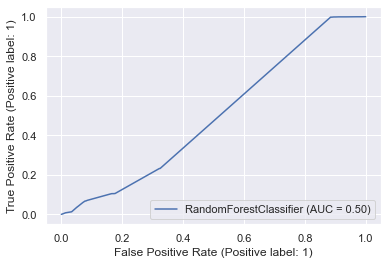

In [303]:
metrics.plot_roc_curve(rf_smote, X_final, y_final)

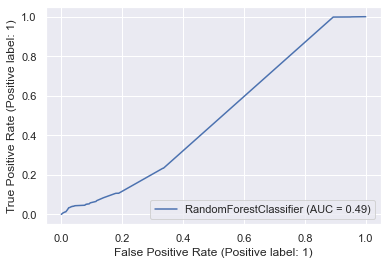

In [304]:
metrics.plot_roc_curve(rf_ros, X_final, y_final)

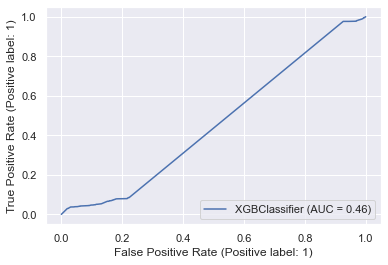

In [305]:
metrics.plot_roc_curve(xgb_ros, X_final, y_final)

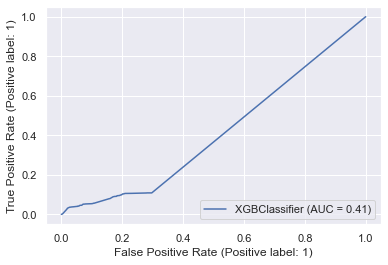

In [306]:
metrics.plot_roc_curve(xgb_smote, X_final, y_final)

## Cost Benefit Analysis

In [307]:
# Let us merge the dataset to form the original

fraud = pd.concat([credit_fraud, test_data], axis=0)
fraud.head()

,amt,gender,city_pop,is_fraud,Age,Day_of_Week,Month,Dist,Unnamed: 0,trans_date_trans_time,...,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long
0,1.603420,1,8.159089,0,31.0,2.0,1.0,10.509708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.674976,1,5.003946,0,41.0,2.0,1.0,30.171468,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.394127,0,8.331827,0,57.0,2.0,1.0,107.746268,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.806662,0,7.569928,0,52.0,2.0,1.0,97.629363,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.736717,0,4.595120,0,33.0,2.0,1.0,66.236025,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### - Part I: Analyse the dataset and find the following figures:

1. Average number of transactions per month 
2. Average number of fraudulent transactions per month
3. Average amount per fraudulent transaction 

In [308]:
# Since the given (original) dataset is from Jan 1 2019 to Dec 31 2020, the data is of 24 months
# Total transactions can be found by checking the shape of the original dataframe
# Avg transactions per month would be to divide that shape/total by 24 (months)

avg_transactions_pm = fraud.shape[0]//24

In [309]:
print("1. Average number of transactions per month are:", avg_transactions_pm)

1. Average number of transactions per month are: 77183


In [310]:
# Checking only for fraudulent transactions:

fraud[fraud.is_fraud == 1]

,amt,gender,city_pop,is_fraud,Age,Day_of_Week,Month,Dist,Unnamed: 0,trans_date_trans_time,...,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long
2449,5.638568,0,6.785588,1,30.0,3.0,1.0,46.889324,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2472,2.444085,1,14.282884,1,58.0,3.0,1.0,42.873523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2523,5.621523,1,14.282884,1,58.0,3.0,1.0,26.835621,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2546,1.950187,0,6.785588,1,30.0,3.0,1.0,11.727809,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2553,5.619422,1,14.282884,1,58.0,3.0,1.0,38.707258,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,1041.510000,M,14462.000000,1,NaN,NaN,NaN,NaN,517197.0,2020-12-22 22:05:48,...,MS,38668.0,34.6323,-89.8855,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1.387750e+09,34.573471,-89.911011
517274,868.090000,M,14462.000000,1,NaN,NaN,NaN,NaN,517274.0,2020-12-22 22:18:07,...,MS,38668.0,34.6323,-89.8855,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1.387751e+09,34.091227,-90.390612
517341,1039.420000,M,14462.000000,1,NaN,NaN,NaN,NaN,517341.0,2020-12-22 22:31:48,...,MS,38668.0,34.6323,-89.8855,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1.387752e+09,34.628434,-90.284780
517529,289.270000,M,14462.000000,1,NaN,NaN,NaN,NaN,517529.0,2020-12-22 23:06:03,...,MS,38668.0,34.6323,-89.8855,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1.387754e+09,34.746063,-90.401093


In [311]:
# Fraudulent transactions are 9651 (number of rows) that are spread across 24 months
# Avg fraudulent transactions per month would be to divide the shape/total fraudulent rows by 24 (months)

avg_fraudtrans_pm = fraud[fraud.is_fraud == 1].shape[0]//24

In [312]:
print("2. Average number of fraudulent transactions per month are:", avg_fraudtrans_pm)


2. Average number of fraudulent transactions per month are: 402


In [313]:
# Average amount of fraud is the total fraudulent amount divided by the total number of fraudulent transactions

avg_fraud_amt = fraud[fraud.is_fraud == 1].amt.sum()//fraud[fraud.is_fraud == 1].shape[0]

In [314]:
print("3. Average amount per fraudulent transactions is:", avg_fraud_amt)

3. Average amount per fraudulent transactions is: 121.0


### Part II: Compare the cost incurred per month by the bank before and after the model deployment:

- Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month

- Cost incurred per month after the model is built and deployed: (Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below)

- Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = USD 1.5

- Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.

- Let FN be the average number of transactions per month that are fraudulent but not detected by the model

- Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN

- Therefore, the cost incurred per month after the model is built and deployed = 1.5 * TF + Average amount per fraudulent transaction * FN

- Final savings = Cost incurred before - Cost incurred after

In [315]:
# Calculating the cost incurred before deploying the model based on the first point descibed above:

cost_before_model = avg_fraud_amt*avg_fraudtrans_pm
cost_before_model

48642.0

In [316]:
# Let TF be the average number of transactions per month detected as fraudulent by the model 
# Since the test dataframe has 7 months data, dividing by 7

TF = fraud_df.y_pred.sum()//7
print("Total cost of providing customer support per month for fraudulent transactions detected by the model =", TF*1.5)

Total cost of providing customer support per month for fraudulent transactions detected by the model = 459.0


In [322]:
# average number of transactions per month detected as fraudulent by the model 
TF

306

In [317]:
# Let FN be the average number of transactions per month that are fraudulent but not detected by the model
# Since the test dataframe has 7 months data, dividing by 7

FN = fraud_df[fraud_df.y_pred==0].is_fraud.sum()//7
print("Cost incurred due to these fraudulent transactions left undetected by the model =", FN*avg_fraud_amt)

Cost incurred due to these fraudulent transactions left undetected by the model = 0.0


In [323]:
# average number of transactions per month that are fraudulent but not detected by the model
FN

0

In [318]:
# Cost incurred after the model is deployed:

cost_after_model = (TF*1.5) + (FN*avg_fraud_amt)
cost_after_model

459.0

In [319]:
# Final savings = Cost incurred before - Cost incurred after

Final_Savings = int(cost_before_model - cost_after_model)
print("Final Savings after deploying the model are: $",Final_Savings)

Final Savings after deploying the model are: $ 48183
